In [1]:
!git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
Updating files:   0% (6/13996)
Updating files:   0% (130/13996)
Updating files:   1% (140/13996)
Updating files:   2% (280/13996)
Updating files:   3% (420/13996)
Updating files:   3% (466/13996)
Updating files:   4% (560/13996)
Updating files:   5% (700/13996)
Updating files:   5% (809/13996)
Updating files:   6% (840/13996)
Updating files:   7% (980/13996)
Updating files:   8% (1120/13996)
Updating files:   9% (1260/13996)
Updating files:  10% (1400/13996)
Updating files:  10% (1405/13996)
Updating files:  11% (1540/13996)
Updating files:  12% (1680/13996)
Updating files:  12% (1751/13996)
Updating files:  13% (1820/13996)
Updating files:  14% (1960/13996)
Updating files:  14% (2039/13996)
Updating files:  15% (2100/13996)
Updating files:  16% (2240/13996)
Updating files:  16% (2327/13996)
Updating files:  17% (2380/13996)
Updating files:  18% (2520/13996)
Updating files:  19% (2660/13996)
Updating files:  20% (2800/13996)
Updating files:  20% (28

In [15]:
import csv
import os
from shutil import copyfile
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np

In [2]:
data = {}
with open(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\facial_expressions\data\legend.csv') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        key = row[2].lower()
        if key in data:
            data[key].append(row[1])
        else:
            data[key] = [row[1]]
            
data
    

{'anger': ['facial-expressions_2868588k.jpg',
  'Alejandro_Toledo_0004.jpg',
  'Alexander_Lukashenko_0001.jpg',
  'Alicia_Hollowell_0001.jpg',
  'Alvaro_Noboa_0002.jpg',
  'Al_Gore_0002.jpg',
  'Anastasia_Myskina_0001.jpg',
  'Anastasia_Myskina_0003.jpg',
  'Angelina_Jolie_0005.jpg',
  'Arnold_Schwarzenegger_0023.jpg',
  'Atal_Bihari_Vajpayee_0010.jpg',
  'Ben_Braun_0001.jpg',
  'Billy_Crystal_0004.jpg',
  'Billy_Donovan_0001.jpg',
  'Bill_Graham_0005.jpg',
  'Bob_Huggins_0001.jpg',
  'Bob_Huggins_0004.jpg',
  'Brian_Scalabrine_0001.jpg',
  'Bud_Selig_0004.jpg',
  'Carlos_Arroyo_0001.jpg',
  'Carlos_Ortega_0001.jpg',
  'Celine_Dion_0008.jpg',
  'Charles_Moose_0001.jpg',
  'Charles_Moose_0002.jpg',
  'Charles_Moose_0004.jpg',
  'Charles_Moose_0006.jpg',
  'Charles_Moose_0013.jpg',
  'Colin_Powell_0007.jpg',
  'Colin_Powell_0030.jpg',
  'Colin_Powell_0043.jpg',
  'Colin_Powell_0055.jpg',
  'Colin_Powell_0149.jpg',
  'Colin_Powell_0180.jpg',
  'Colin_Powell_0181.jpg',
  'Colin_Powell_0188

In [3]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [10]:
os.mkdir('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data')
os.mkdir('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\training')
os.mkdir('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\testing')

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'G:\\Coding ninjas\\Data Science & Machine Learning\\Milestone 11\\master_data\training'

In [12]:
os.mkdir('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\training')
os.mkdir('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\testing')

In [13]:
for emotion in emotion_list:
    os.mkdir(os.path.join('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\training', emotion))
    os.mkdir(os.path.join('G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\testing', emotion))
    

In [22]:
split_size = 0.8

for emotion, images in data.items():
    train_size = int(split_size * len(images))
    train_images = images[:train_size]
    test_images = images[train_size:]
    
    for image in train_images:
        source = os.path.join(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\facial_expressions\images', image)
        dest = os.path.join(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\training', emotion, image)
        copyfile(source, dest)
        
    for image in test_images:
        source = os.path.join(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\facial_expressions\images', image)
        dest = os.path.join(r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\testing', emotion, image)
        copyfile(source, dest)

In [3]:
model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (100,100,3)),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation ='relu'),
    layers.MaxPooling2D(pool_size = 2,  padding = 'same'),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation ='relu'),
    layers.MaxPooling2D(pool_size = 2, padding = 'same'),
    layers.Dropout(0.2),

    
    layers.Flatten(),
    
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.Dense(units = 8, activation = 'softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [4]:
train_dir = r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\training'
test_dir = r'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\master_data\\testing'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [5]:
es = EarlyStopping(monitor='val_acc', patience = 3, min_delta=0.01)

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [11]:
model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = test_generator,
                      callbacks = [es])

Epoch 1/10
86/86 [==============================] - 247s 3s/step - loss: 0.2663 - acc: 0.9030 - val_loss: 2.2353 - val_acc: 0.6743
Epoch 2/10
86/86 [==============================] - 242s 3s/step - loss: 0.2398 - acc: 0.9123 - val_loss: 2.1896 - val_acc: 0.6787
Epoch 3/10
86/86 [==============================] - 248s 3s/step - loss: 0.1962 - acc: 0.9261 - val_loss: 2.5366 - val_acc: 0.6751


In [13]:
model.save('fr.h5')


In [5]:
loaded_model = load_model('fr.h5')

In [7]:
labels = train_generator.class_indices
labels = dict((v, k) for k,v in labels.items())
labels

{0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happiness',
 5: 'neutral',
 6: 'sadness',
 7: 'surprise'}

In [13]:
final_test = 'G:\Coding ninjas\Data Science & Machine Learning\Milestone 11\\facial_expressions\\test'

final_test_datagen = ImageDataGenerator(rescale = 1.0/255)
final_test_data = final_test_datagen.flow_from_directory(final_test,
                                                        target_size = (100, 100),
                                                        classes = ['images'],
                                                        batch_size = 32)



Found 263 images belonging to 1 classes.


In [16]:
for data_batch in final_test_data:
    pred = loaded_model.predict(data_batch[0])
    pred_indices = np.argmax(pred, axis = 1)
    break
    


1/1 [==============================] - 0s 200ms/step


In [17]:
pred_indices

array([4, 4, 4, 2, 4, 4, 5, 5, 2, 2, 4, 2, 4, 5, 2, 2, 7, 2, 6, 6, 2, 4,
       2, 4, 5, 2, 2, 4, 2, 6, 4, 2], dtype=int64)

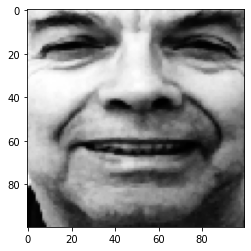

happiness


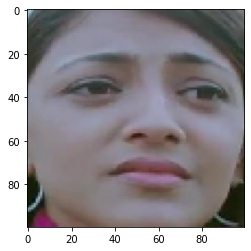

happiness


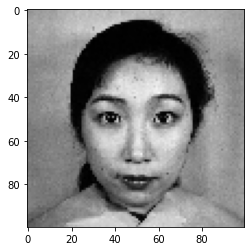

happiness


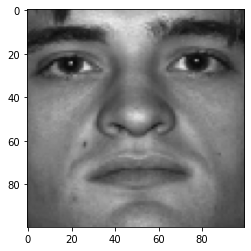

disgust


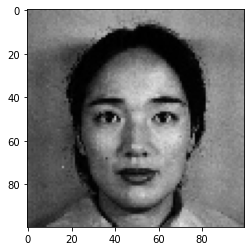

happiness


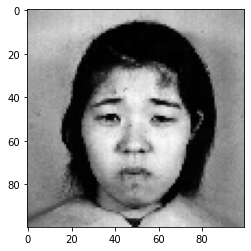

happiness


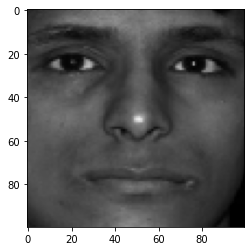

neutral


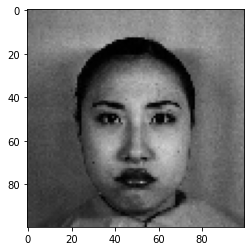

neutral


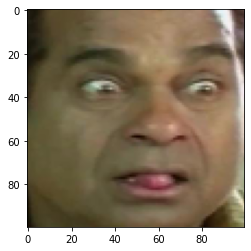

disgust


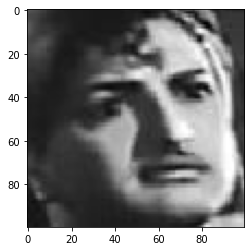

disgust


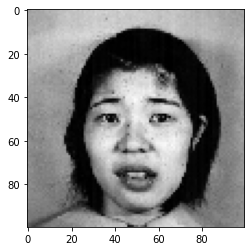

happiness


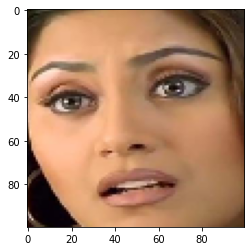

disgust


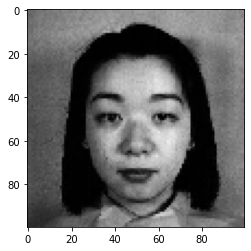

happiness


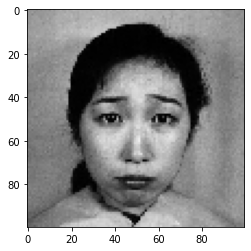

neutral


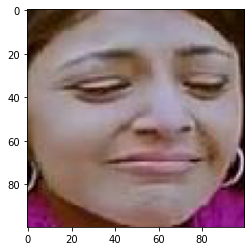

disgust


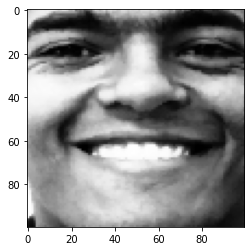

disgust


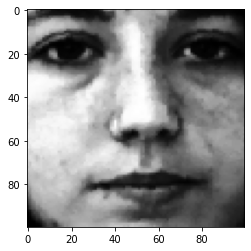

surprise


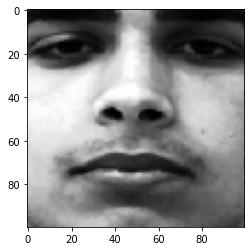

disgust


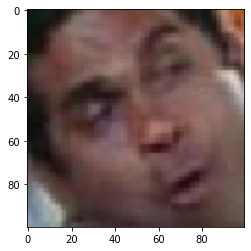

sadness


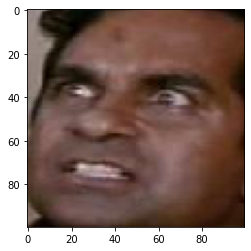

sadness


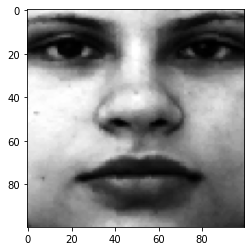

disgust


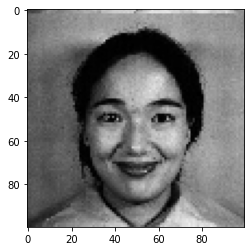

happiness


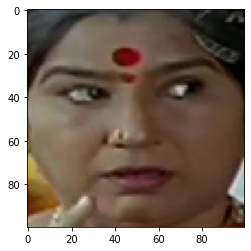

disgust


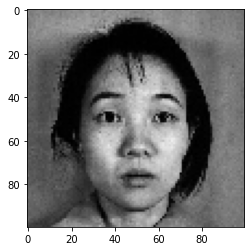

happiness


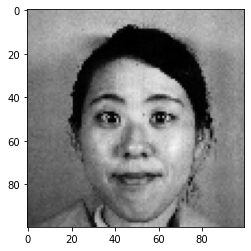

neutral


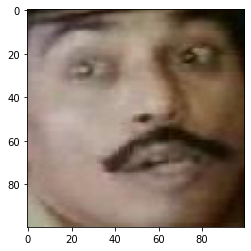

disgust


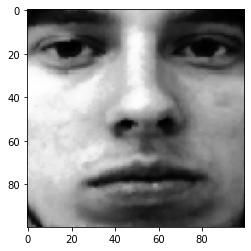

disgust


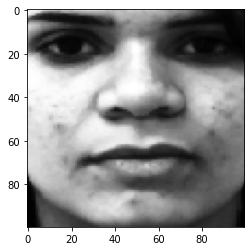

happiness


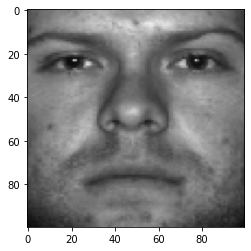

disgust


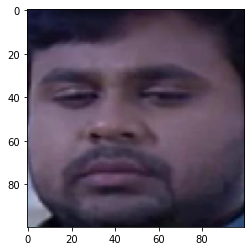

sadness


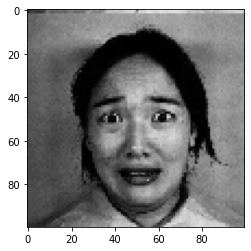

happiness


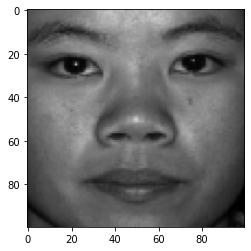

disgust


In [18]:
i = 0
for i in range(data_batch[0].shape[0]):
    plt.imshow(data_batch[0][i])
    plt.show()
    index = pred_indices[i]
    value = labels[index]
    print(value)
    i+=1
